## 03-Lab  - Regularization- Lasso

In this lab, you will work with Credit dataset - description provided below .
The dataset contains information about credit information of few people and their other details.
Your task is to fit a Lasso regression and compare it with Linear regression & Ridge in terms of accuracy scores(cross-val).
You are required to do the data manipulation (dummy categorical variables), use Lasso  to create the model.

Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Credit.csv

In [1]:
# Import the library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
credit = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Credit.csv', na_values='?').dropna()
credit.info()
credit.head()
import seaborn as sns

#Write your code here or in other code cells down

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 40.6+ KB


In [2]:
# converting categorical variables to dummy indices 
credit_with_dummies = pd.get_dummies(credit)
check_all_variables = credit_with_dummies.dtypes.values
print("Data type of each columns is: \n{}".format(check_all_variables))

# drop unnamed column 
credit_with_dummies = credit_with_dummies.drop(columns=['Unnamed: 0'])
credit_with_dummies

Data type of each columns is: 
[dtype('int64') dtype('float64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('uint8') dtype('uint8') dtype('uint8') dtype('uint8')
 dtype('uint8') dtype('uint8') dtype('uint8') dtype('uint8')
 dtype('uint8')]


,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,1,0,1,0,0,1,0,0,1
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,1,0
2,104.593,7075,514,4,71,11,580,1,0,1,0,1,0,0,1,0
3,148.924,9504,681,3,36,11,964,0,1,1,0,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,1,0,1,0,0,1,0,0,1
396,13.364,3838,296,5,65,17,480,1,0,1,0,1,0,1,0,0
397,57.872,4171,321,5,67,12,138,0,1,1,0,0,1,0,0,1
398,37.728,2525,192,1,44,13,0,1,0,1,0,0,1,0,0,1


Data type of each columns is: <br>
[dtype('int64') dtype('float64') dtype('int64') dtype('int64') <br>
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') <br>
 dtype('uint8') dtype('uint8') dtype('uint8') dtype('uint8') <br>
 dtype('uint8') dtype('uint8') dtype('uint8') dtype('uint8') <br>
 dtype('uint8')] <br>

In [3]:
# checking for missing values 
check_missing = credit_with_dummies.isnull().any().values
print("Check if any values are null we get: \n{}".format(check_missing))


Check if any values are null we get: 
[False False False False False False False False False False False False
 False False False False]


Check if any values are null we get: <br>
[False False False False False False False False False False False False  <br>
 False False False False False] <br>

In [20]:

X = credit_with_dummies.drop(columns=['Balance'])
# X = credit_with_dummies[['Rating', 'Income']]
y = credit_with_dummies['Balance']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=2)
pf = PolynomialFeatures(degree=2)
poly_X = pf.fit_transform(X_train)
y_train = y_train[:, np.newaxis]
poly_test_X = pf.fit_transform(X_train)
y_test = y_test[:, np.newaxis]
poly_test_X = pf.fit_transform(X_test)


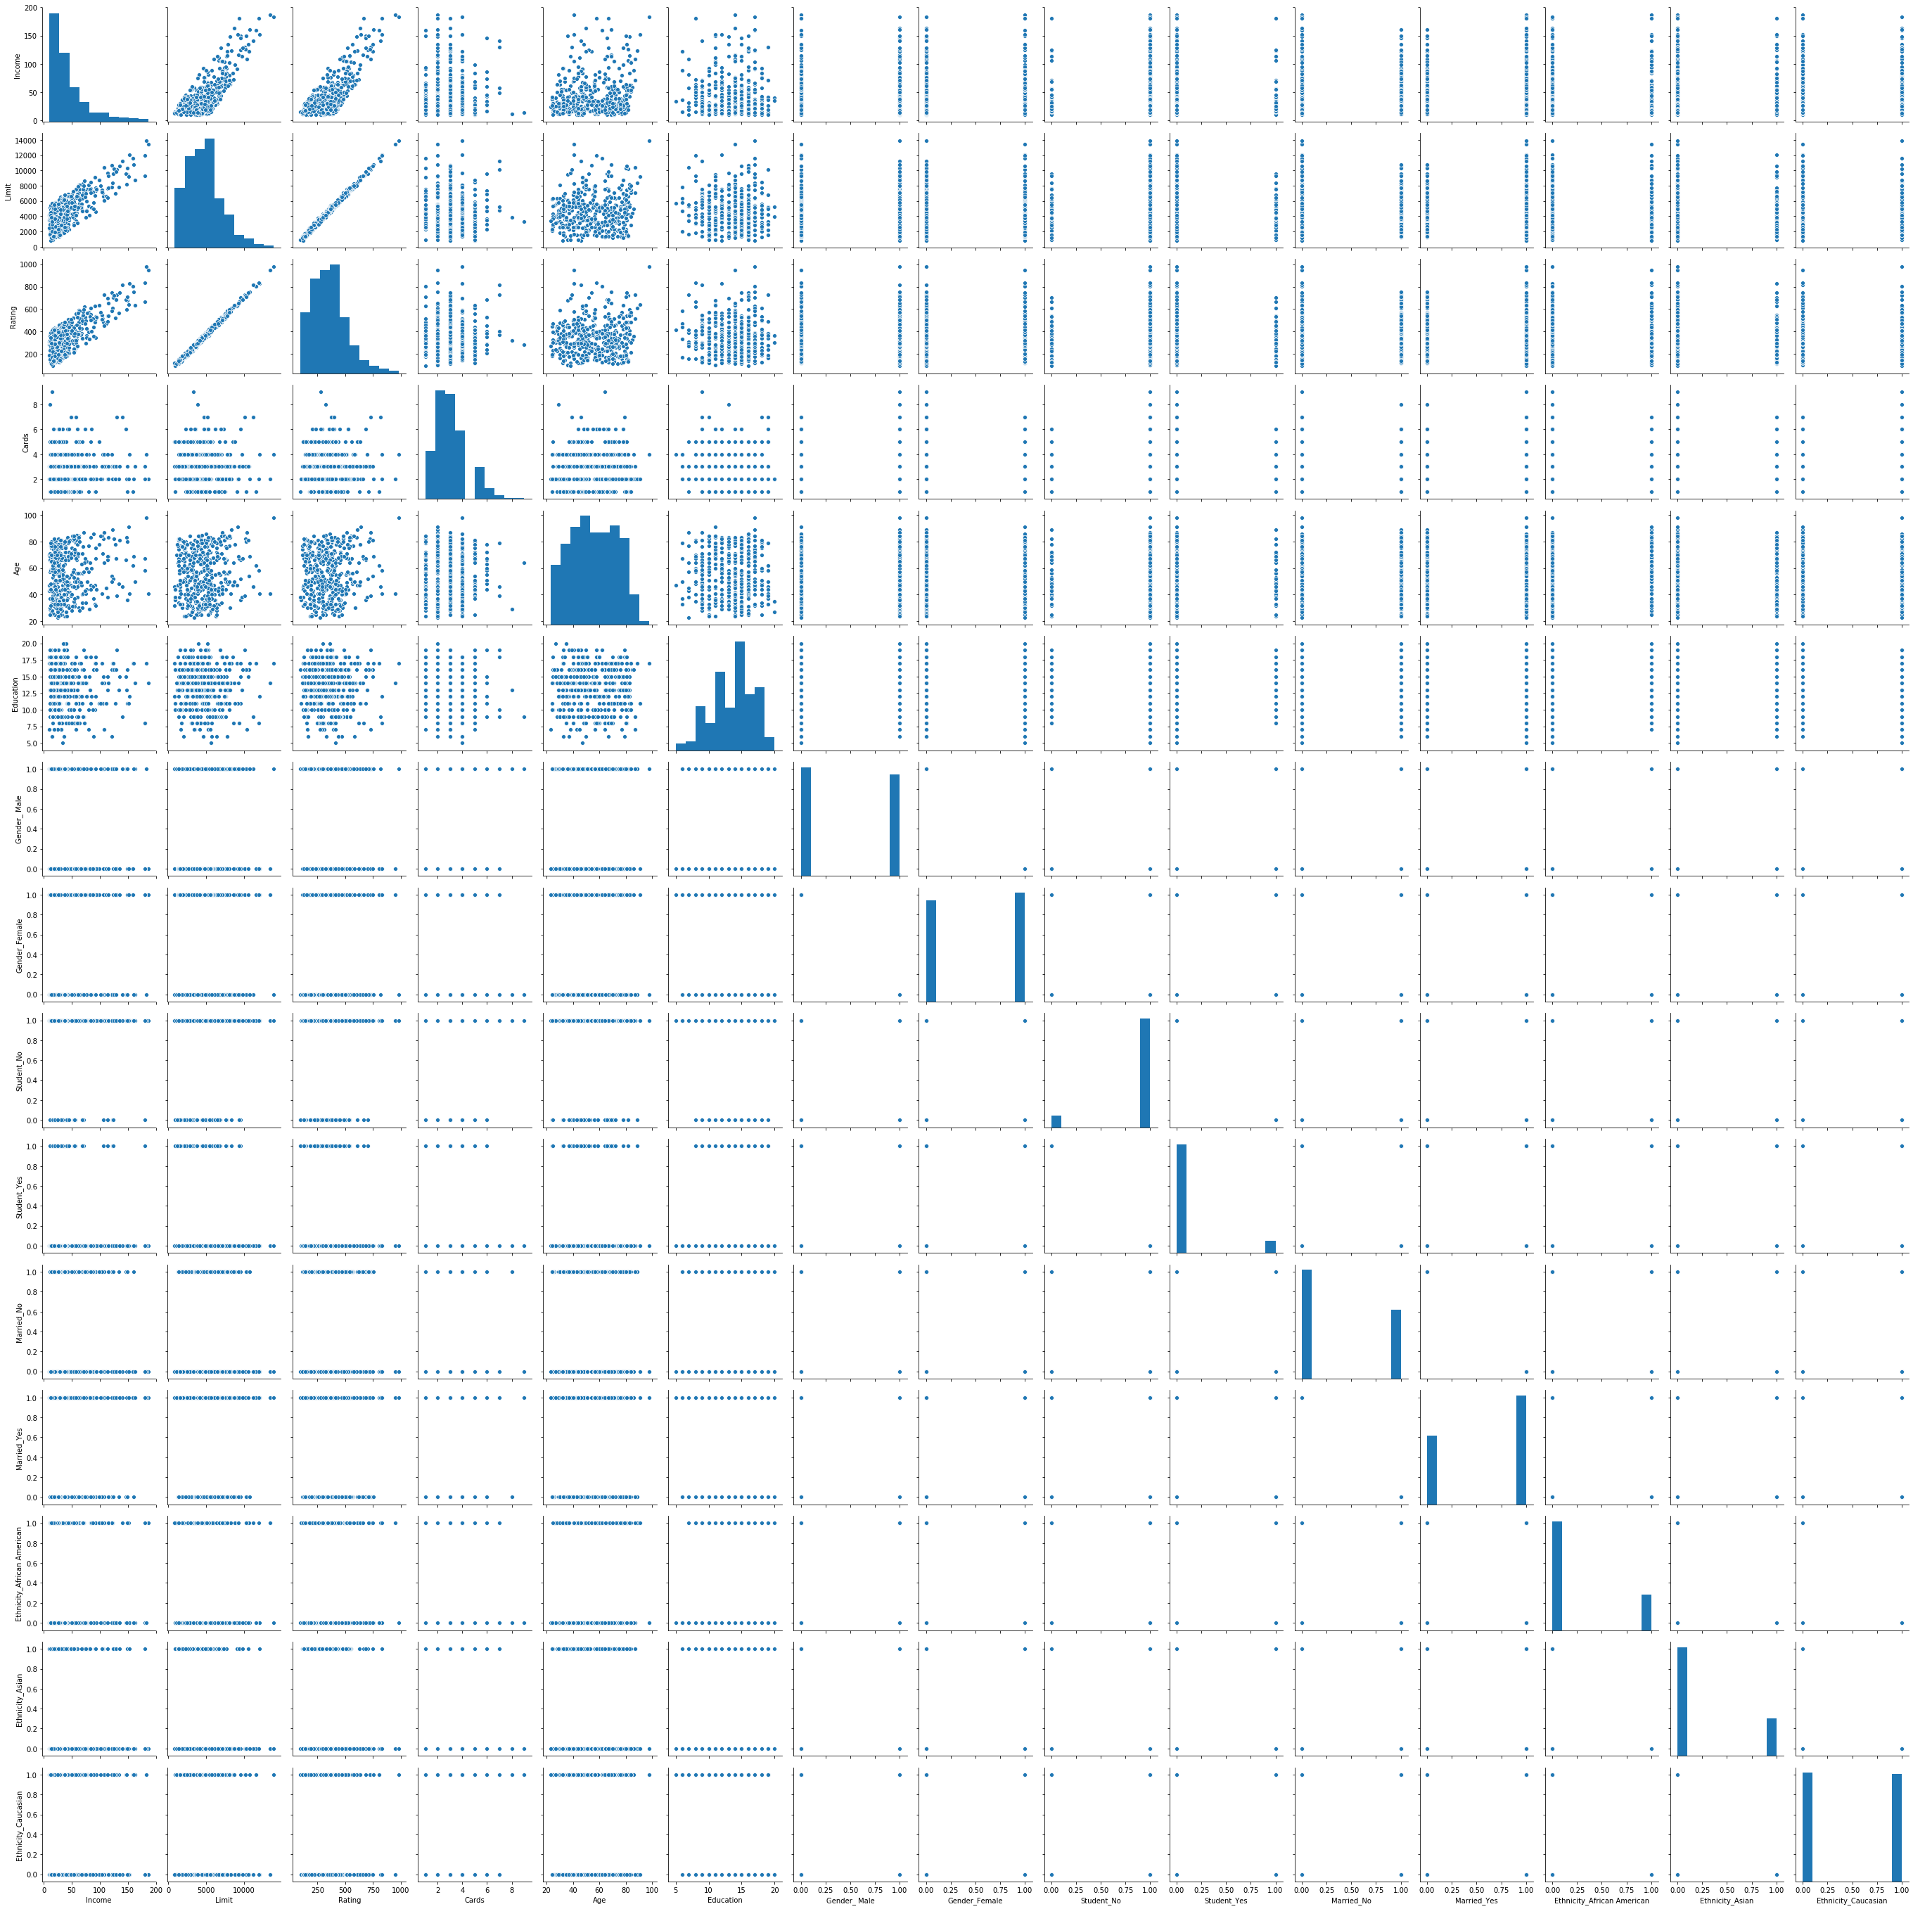

In [21]:
sns.pairplot(X)

In [22]:
lr = LinearRegression()
lr.fit(poly_X, y_train)
y_pred = lr.predict(poly_test_X)
mean_squared_error(y_pred, y_test)


3580.8310191806686

In [34]:
lr_ridge = Ridge(alpha=0.00001, normalize=True, max_iter=20000)
lr_ridge.fit(poly_X, y_train)
y_pred = lr_ridge.predict(poly_test_X)
mean_squared_error(y_pred, y_test)


3484.469741717519

In [58]:
lr_lasso = Lasso(alpha=0.01, normalize=True, max_iter=200000)
lr_lasso.fit(poly_X, y_train)
y_pred = lr_lasso.predict(poly_test_X)
mean_squared_error(y_pred, y_test)

2910.799391557263

In [76]:
import statsmodels.api as sm
st_model = sm.OLS(y_train, poly_X).fit()
pred_y = st_model.predict(poly_test_X)
mean_squared_error(pred_y, y_test)


3580.831018676015

In [110]:
rmodel = sm.OLS(y_train, poly_X)
ridge_sm = rmodel.fit_regularized(method='elastic_net', alpha=0.01, L1_wt=1.0)
pred_y = ridge_sm.predict(poly_test_X)
mean_squared_error(pred_y, y_test)

8446.490109775732